## Задание 4. Классификация: деревья решений (телефоны)

1. Загрузите набор данных о мобильных телефонах: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
1. Изучите полученный набор данных.
1. Преобразуйте набор данных, подготовив его к применению классификации с помощью дерева решений: 
 выполните минимальные необходимые манипуляции, а также отделите столбец с меткой price_range и разбейте данные на тренировочный и тестовый наборы.
1. Обучите классификатор DecisionTreeClassifier на тренировочном наборе.
1. Используйте обученную модель на тестовых данных, оцените полученные результаты с помощью нескольких метрик.
1. Визуализируйте и интерпретируйте обученную модель.
1. Нормализуйте данные и обучите дерево на них. Как нормализация повлияла на результаты предсказания?
1. Подберите значения гиперпараметров с помощью RandomizedSearchCV.
1. Сделайте выводы об использовании (плюсах и минусах) деревьев решений для классификации в целом и применительно к рассмотренному набору данных.
1. Примените ансамблевый метод на основе деревьев решений случайный лес RandomForestClassifier,

In [18]:
import pandas as pd
import scipy
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
pd.set_option("display.max_columns", None)
%matplotlib inline
sns.set_color_codes("pastel")

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
from plotly.offline import iplot

# Скачиваем и анализируем датасет

In [19]:
# Качаем файл, который заранее подготовили и преобразовали его в csv
# https://www.mediafire.com/file/7fuyz9od0qgki3u/Mobile_Price_Classification.csv/file

# Это прямая ссылка на загрузку, возможно её нужно будет обновить
!wget -O train.csv https://download1591.mediafire.com/ienk2ft77bag3eHPdeQnTyRsq3xv6ZtTV_Wb2r3MJQ7m79k9SXsAVZFh-EXub6m2TCSwPFH2AsdKgKv0X5PDt0Z33EpgZBirCvuOOGngixgX3N7q8D7k1LyKE_x2mr-yqMMUmeEMgI64zv8jX3EkYEEPJEKTx-zMqdhCDuIxJg/7fuyz9od0qgki3u/Mobile+Price+Classification.csv

--2023-06-09 10:48:52--  https://download1591.mediafire.com/ienk2ft77bag3eHPdeQnTyRsq3xv6ZtTV_Wb2r3MJQ7m79k9SXsAVZFh-EXub6m2TCSwPFH2AsdKgKv0X5PDt0Z33EpgZBirCvuOOGngixgX3N7q8D7k1LyKE_x2mr-yqMMUmeEMgI64zv8jX3EkYEEPJEKTx-zMqdhCDuIxJg/7fuyz9od0qgki3u/Mobile+Price+Classification.csv
Загружен сертификат CA «/etc/ssl/certs/ca-certificates.crt»
Распознаётся download1591.mediafire.com (download1591.mediafire.com)… 199.91.152.91
Подключение к download1591.mediafire.com (download1591.mediafire.com)|199.91.152.91|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 122403 (120K) [text/plain]
Сохранение в: «train.csv»

train.csv           100%[===================>] 119,53K   226KB/s    за 0,5s    

2023-06-09 10:48:53 (226 KB/s) - «train.csv» сохранён [122403/122403]



In [20]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**battery_power** -- объём аккумулятора в mAh  
**blue** -- наличие блютуза  
**clock_speed** -- частота процессора в GHz  
**dual_sim** -- наличие DualSim  
**fc** -- кол-во MP фронтальной камеры  
**four_g** -- наличие 4G  
**int_memory** -- объём SD памяти в GB  
**m_dep** -- толщина устройства в сантиметрах  
**mobile_wt** -- вес устройства в граммах  
**n_cores** -- кол-во ядер процессора  
**pc** -- кол-во MP основной камеры  
**px_height** -- высота разрешения экрана в px  
**px_width** -- ширина разрешения экрана в px  
**ram** -- объём ОЗУ в MB 
**sc_h** -- высота устройства в см.  
**sc_w** -- ширина устройства в см.  
**talk_time** -- максимальное время разговора в часах  
**three_g** -- наличие 3G  
**touch_screen** -- наличие тачскрина  
**wifi** -- наличие WiFi  
**price_range** -- ценовой диапазон (целевой признак)  

In [21]:
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Посмотрим на датасет

In [23]:
real_cols = [
    'battery_power', 'clock_speed', 'int_memory', 'm_dep', 
    'mobile_wt', 'n_cores', 'fc', 'pc', 
    'px_height', 'px_width', 'ram', 'sc_h', 
    'sc_w', 'talk_time'
  ]
categorial_cols = [
    'blue', 'dual_sim', 'four_g', 'wifi', 'price_range'
  ]

In [24]:
fig = go.Figure()

for col in real_cols:
    fig.add_trace(go.Box(y=df[col], name=col, boxpoints='suspectedoutliers', jitter=0.9, pointpos=0))

fig.update_layout(boxmode='group')
fig.show()

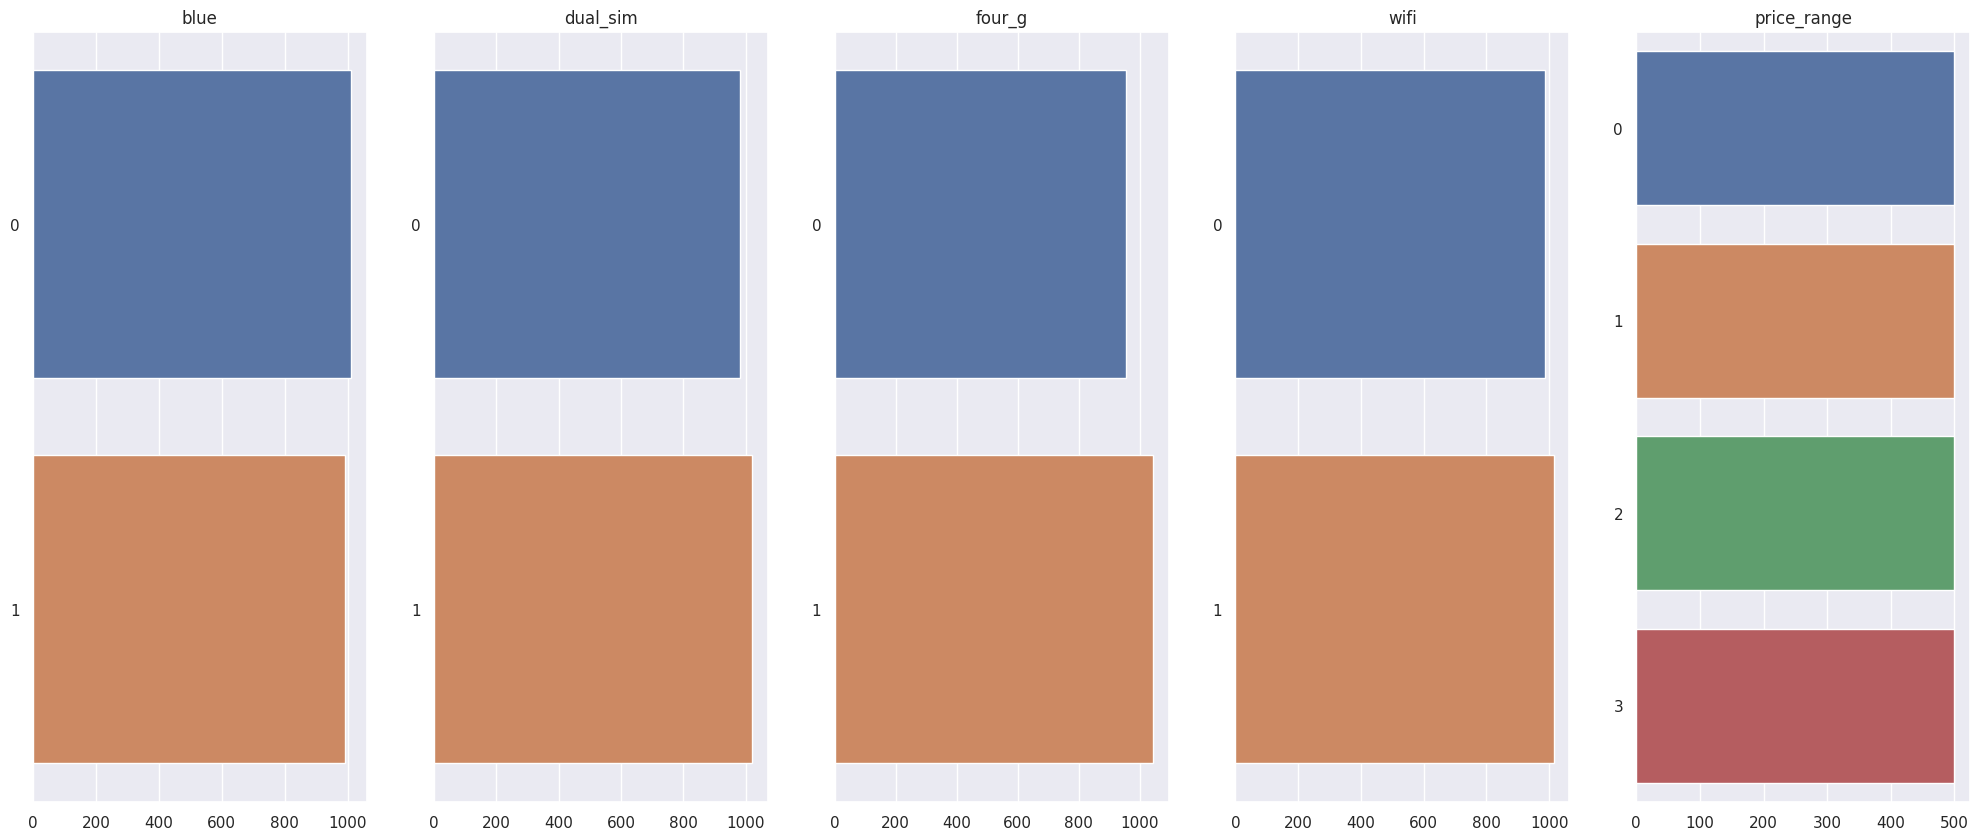

In [25]:
{col: list(df[col].unique()) for col in categorial_cols}

fig, axes = plt.subplots(nrows=1, ncols=len(categorial_cols), figsize=(25,10)) 
idx = 0
for idx, col in enumerate(categorial_cols): 
  g = sns.countplot(y=df[col], ax=axes[idx], orient="h")
  g.set_title(col)
  g.set(ylabel=None)
  g.set(xlabel=None)
plt.show()

## Корреляция признаков

In [26]:
import plotly.express as px

fig = px.imshow(df.corr())

fig.show()

Просто ужасно, теперь даже линейная регрессионная модель будет выдавать минимум 91%, спасибо признаку ram. Посмотрим как деревья справятся

# Предобработка данных

In [27]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
import pickle

df_norm = df.copy(True) # Сделаем копию, чтобы нормализованные данные были отдельно

## Предобрабатываем данные

In [28]:
enc = OrdinalEncoder()
df_norm[categorial_cols] = enc.fit_transform(df_norm[categorial_cols])
{col: list(df_norm[col].unique()) for col in categorial_cols}

{'blue': [0.0, 1.0],
 'dual_sim': [0.0, 1.0],
 'four_g': [0.0, 1.0],
 'wifi': [1.0, 0.0],
 'price_range': [1.0, 2.0, 3.0, 0.0]}

In [29]:
scaler = StandardScaler()
df_norm[real_cols] = scaler.fit_transform(df_norm[real_cols])
df_norm[real_cols].describe()

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,n_cores,fc,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.149392e-16,-1.545430e-16,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,5.861978e-17,1.403322e-16,1.181277e-16,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-1.253064e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-9.928904e-01,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00
25%,-8.804033e-01,-1.007906e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-7.624947e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01
50%,-2.849593e-02,-2.727384e-02,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,-3.017032e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03
75%,8.575560e-01,8.307794e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,6.198797e-01,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01
max,1.728812e+00,1.811412e+00,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,3.384628e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00


# Обучаем модели

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def model_name(model): 
  return type(model).__name__

def load_model(path):
  if not path.is_file(): 
    return None
  with path.open('rb') as f:
    return pickle.load(f)
  
def save_model(model, path):
  with path.open('wb') as f:
    pickle.dump(model, f)

def model_stats(model, m_name=None):
  if m_name is None:
    m_name = model_name(model)
  print(f"\n### Model '{m_name}':")
  print(f"Score: {model.score(X_test, y_test) * 100:.4f}%")

def model_feature_importance(model, feature_list=None, percent_multiply=100):
  if feature_list is None:
    feature_list = X_train.columns
  importances = list(model.feature_importances_)
  feature_importances = sorted(zip(feature_list, importances), key = lambda x: x[1], reverse = True)
  for feature, importance in feature_importances:
    print(f"Feature: {feature:25} Importance: {importance*percent_multiply:.4f}%")

def model_roc_curve(model):
  y_pred = model.predict_proba(X_test)
  fpr, tpr, threshold = roc_curve(y_test, y_pred[:, 1], pos_label=1)
  roc_auc = auc(fpr, tpr)

  fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={roc_auc:.4f})',
    labels=dict(
      x='False Positive Rate', 
      y='True Positive Rate'))
  
  fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1)
  fig.show()

def model_report(model):
  y_pred = model.predict_proba(X_test)
  print(classification_report(y_test, y_pred))

def model_confusion(model):
  y_pred = model.predict_proba(X_test)
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

## Разделяем ненормализованный датасет

In [31]:
X = df.drop(columns=['price_range'])
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=42, stratify=y)

## Обучим дерево на ненормализованных данных

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model_stats(model)
model_feature_importance(model)
model_roc_curve(model)


### Model 'DecisionTreeClassifier':
Score: 81.6817%
Feature: ram                       Importance: 62.9863%
Feature: px_width                  Importance: 10.6638%
Feature: battery_power             Importance: 9.9303%
Feature: px_height                 Importance: 7.6832%
Feature: mobile_wt                 Importance: 1.8251%
Feature: int_memory                Importance: 1.2005%
Feature: sc_h                      Importance: 1.0564%
Feature: pc                        Importance: 1.0101%
Feature: m_dep                     Importance: 0.8754%
Feature: talk_time                 Importance: 0.7232%
Feature: n_cores                   Importance: 0.6254%
Feature: clock_speed               Importance: 0.4598%
Feature: sc_w                      Importance: 0.3110%
Feature: four_g                    Importance: 0.1499%
Feature: three_g                   Importance: 0.1499%
Feature: blue                      Importance: 0.1333%
Feature: fc                        Importance: 0.1165%
Feature: d

## Разделим нормализованный датасет

In [33]:
X = df_norm.drop(columns=['price_range'])
y = df_norm['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=42, stratify=y)

## Дерево на нормализованных данных

In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model_stats(model)
model_feature_importance(model)
model_roc_curve(model)


### Model 'DecisionTreeClassifier':
Score: 81.8318%
Feature: ram                       Importance: 62.3488%
Feature: px_width                  Importance: 10.3750%
Feature: battery_power             Importance: 10.1702%
Feature: px_height                 Importance: 7.4209%
Feature: mobile_wt                 Importance: 2.4596%
Feature: m_dep                     Importance: 1.2486%
Feature: int_memory                Importance: 1.1005%
Feature: pc                        Importance: 1.0268%
Feature: clock_speed               Importance: 0.9454%
Feature: sc_h                      Importance: 0.7951%
Feature: n_cores                   Importance: 0.5976%
Feature: sc_w                      Importance: 0.3490%
Feature: talk_time                 Importance: 0.3353%
Feature: dual_sim                  Importance: 0.2332%
Feature: blue                      Importance: 0.1777%
Feature: wifi                      Importance: 0.1666%
Feature: three_g                   Importance: 0.1333%
Feature: 

# Визуализируем дерево

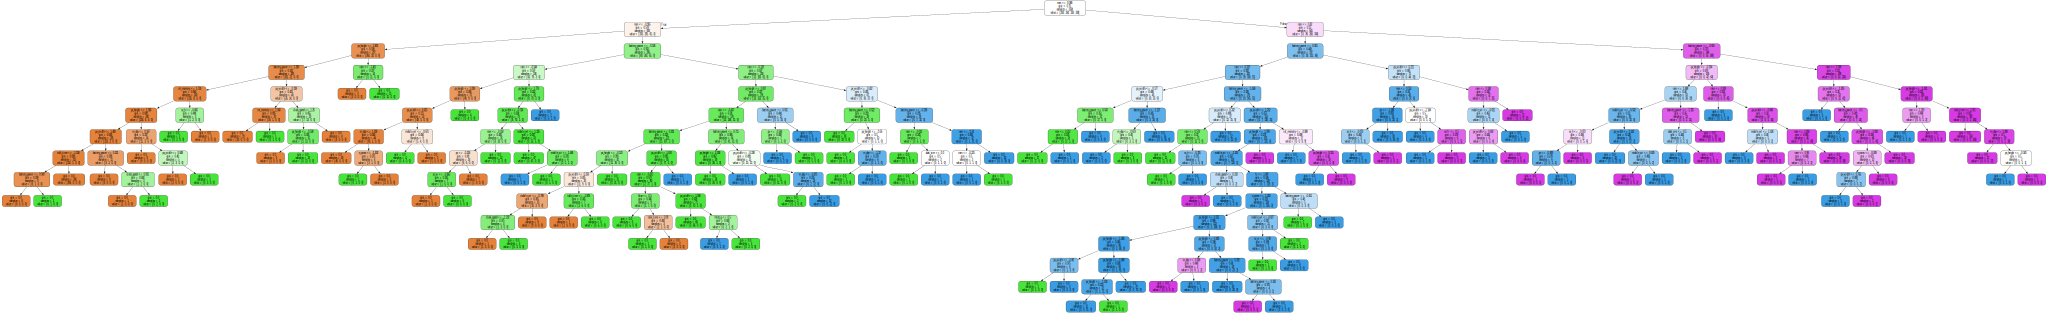

In [35]:
from sklearn import tree
from graphviz import Source

Source(tree.export_graphviz(model, out_file=None, feature_names=model.feature_names_in_, rounded=True, filled=True))

## Тюним дерево

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from pathlib import Path

model_path = Path('dt_tuned.pkl')
model = load_model(model_path)
if model is None:
  params = {
    'max_depth': [7, None],
    'max_features': randint(5, len(X_train.columns)),
    'min_samples_leaf': randint(1, 9),
    'criterion': ['gini', 'entropy']
  }
  clf = RandomizedSearchCV(DecisionTreeClassifier(), params, verbose=10)
  clf.fit(X_train, y_train)
  model = clf.best_estimator_
  print('Best params:', clf.best_params_)
  save_model(model, model_path)

model_stats(model)
model_roc_curve(model)


### Model 'DecisionTreeClassifier':
Score: 84.8348%


## Применим ансамбль --- Случайный лес

In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
model_stats(model)
model_feature_importance(model)
model_roc_curve(model)


### Model 'RandomForestClassifier':
Score: 88.1381%
Feature: ram                       Importance: 46.6242%
Feature: battery_power             Importance: 7.4449%
Feature: px_width                  Importance: 5.9134%
Feature: px_height                 Importance: 5.7336%
Feature: mobile_wt                 Importance: 3.9986%
Feature: int_memory                Importance: 3.8858%
Feature: talk_time                 Importance: 3.0831%
Feature: pc                        Importance: 3.0124%
Feature: clock_speed               Importance: 2.8630%
Feature: sc_w                      Importance: 2.8365%
Feature: sc_h                      Importance: 2.8316%
Feature: fc                        Importance: 2.5611%
Feature: m_dep                     Importance: 2.5318%
Feature: n_cores                   Importance: 2.4095%
Feature: four_g                    Importance: 0.7754%
Feature: blue                      Importance: 0.7513%
Feature: touch_screen              Importance: 0.7488%
Feature: du

## Проверим как поведёт себя регрессия на нормализованных данных
(чтобы проверить догадку насчёт корреляции ram и целевого признака)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model_stats(model)
model_roc_curve(model)


### Model 'LogisticRegression':
Score: 96.0961%


## А теперь исключим столбец ram и проверил регрессию и случ. лес

In [44]:
from sklearn.linear_model import LogisticRegression

X = df_norm.drop(columns=['price_range', 'ram'])
y = df_norm['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=42, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)
model_stats(model)
model_roc_curve(model)


### Model 'LogisticRegression':
Score: 33.7838%


In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
model_stats(model)
model_feature_importance(model)
model_roc_curve(model)


### Model 'RandomForestClassifier':
Score: 31.0811%
Feature: battery_power             Importance: 10.1055%
Feature: px_width                  Importance: 9.1437%
Feature: px_height                 Importance: 8.7373%
Feature: mobile_wt                 Importance: 8.1015%
Feature: int_memory                Importance: 8.0306%
Feature: pc                        Importance: 6.6798%
Feature: talk_time                 Importance: 6.6455%
Feature: clock_speed               Importance: 6.0388%
Feature: sc_w                      Importance: 5.9706%
Feature: sc_h                      Importance: 5.8384%
Feature: m_dep                     Importance: 5.4948%
Feature: fc                        Importance: 5.0052%
Feature: n_cores                   Importance: 4.9053%
Feature: wifi                      Importance: 1.7447%
Feature: dual_sim                  Importance: 1.6324%
Feature: touch_screen              Importance: 1.6219%
Feature: blue                      Importance: 1.6182%
Feature: fo

# Вывод

Как и ожидалось, нормализация данных не оказывает существенного влияния на обучение моделей использующих деревья.   
Кроме того, для представленных данных явно будет лучшей моделью будет регрессионная, из-за наличия признака имеющего сильную линеную корреляцию.  
И, судя по результатам после исключения столбца ram, очевидно что можно произвести уменьшение размерности признаков.